# ch5. Softmax Classifier
1. http://pythonkim.tistory.com/19
2. 통계에서 가장 큰 값을 찾는 개념을 hardmax, softmax는 새로운 조건으로 가장 큰 값을 찾는 개념을 말한다. 
3. 여기서는 우리가 알고 있는 큰 숫자를 찾는 것이 아니라는 뜻으로 쓰인다.

$c = \sqrt{a^2 + b^2}$ <br/>
$a = b + c$ <br/>
$h(x) = w1x1 + w2x2 + w3x3$

## 1. Lecture Notes

### Softmax()  :  Tensorflow 기본함수
1. 입력을 sigmoid와 마찬가지로 0과 1 사이의 값으로 변환한다.
2. 변환된 결과에 대한 합계가 1이 되도록 만들어 준다. (Sigmoid() 추가기능)

### step1) Introduction

<img src='./img/lec_06_02.png' align='left'>

- Logistic Regression : Wx+b 의 군집의 포함/비포함 함수를 생성 
- ==> Sigmoid를 활용,  [0,1,0,0,1,1...] 의 Binary 로 출력
<br/><p><img src =  './img/lec_06_03.png' align='left'></p>

### step2) Using Matrix
- 행렬곱을 활용하여 데이터를 연산

<img src='./img/lec_06_04.png' align="left">

<img src='./img/lec_06_06.png' align="left">

### http://pythonkim.tistory.com/20

### step3) Sigmoid ()
- 단계별 결과값 (ex> 성적 (A, B, C, D, F) 단위별 계산 

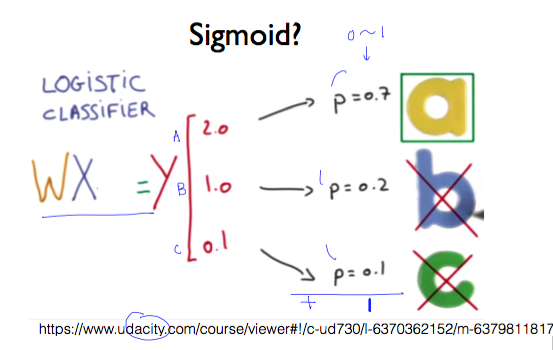

In [13]:
Image('./img/lec_06_10.png')

### step4) H(x)  = SoftMax() 
- Sigmoid () + 총 합이 1
- 가설함수의 최종적인형태

### step5) Cost()
- Cross Entropy cost function
- Log() 그래프를 이용해, 0일때/ 1일때 차이가 극대인 함수를 활용

<img src="./img/lec_06_03.png" align="left">

<img src='./img/lec_06_15.png' align="left">

## 2. Scripts
- http://pythonkim.tistory.com/21

### step1) drawing the Graph

In [1]:
import tensorflow as tf

In [2]:
X = tf.placeholder("float", [None, 4])
Y = tf.placeholder("float", [None, 3])  # One Hot Encoding
nb_classes = 3

In [3]:
W = tf.Variable(tf.random_normal([4, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

<img src="./img/Lab06-1606.png", width=700 align="left">

In [10]:
# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)

# tf.matmul() : Y 결과도 Matrix여서 Matrix 연산을 시행
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)  

<img src="./img/Lab06-1607.png", width=700 align="left">

In [5]:
# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

### step2) Inputing TENSOR
- input Data -------------------------------------------------------------------

In [6]:
tf.set_random_seed(777)  # for reproducibility
x_data = [[1, 2, 1, 1], [2, 1, 3, 2], [3, 1, 3, 4], [4, 1, 5, 5],
          [1, 7, 5, 5], [1, 2, 5, 6], [1, 6, 6, 6], [1, 7, 7, 7]]

In [7]:
# One HoT Encording Method 
# ([0,0,0] 3개 자리 중 1개만 1로 활성화)
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0],
          [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

### step3) Launch the Tensorflow Graph

<img src="./img/Lab06-16-1609.png" align="left" width = 700>

In [8]:
# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(2001):
        sess.run(optimizer, feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}))

0 2.54152
200 0.66025
400 0.552158
600 0.459344
800 0.369089
1000 0.279975
1200 0.230532
1400 0.209576
1600 0.191965
1800 0.176971
2000 0.164062


<P> << 각 각의 합을 1로 조정>> </p>
<img src="./img/Lab06-1610.png" align="left" width=700>

In [9]:
# Testing & One-hot encoding
# arg_max() : Sigmod 연산결과, Hot Encording Method 각합이 1로 조절
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    a = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9]]})
    print( a, sess.run(tf.arg_max(a, 1)),'\n --------------')
    b = sess.run(hypothesis, feed_dict={X: [[1, 3, 4, 3]]})
    print(b, sess.run(tf.arg_max(b, 1)),'\n --------------')
    c = sess.run(hypothesis, feed_dict={X: [[1, 1, 0, 1]]})
    print(c, sess.run(tf.arg_max(c, 1)),'\n --------------')
    all = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9], [1, 3, 4, 3], [1, 1, 0, 1]]})
    print(all, sess.run(tf.arg_max(all, 1)))

[[  9.97986317e-01   1.53468155e-10   2.01371359e-03]] [0] 
 --------------
[[  9.92872059e-01   7.37719820e-04   6.39029033e-03]] [0] 
 --------------
[[ 0.83636302  0.01170094  0.15193604]] [0] 
 --------------
[[  9.97986317e-01   1.53468141e-10   2.01371359e-03]
 [  9.92872059e-01   7.37719820e-04   6.39029033e-03]
 [  8.36363018e-01   1.17009412e-02   1.51936039e-01]] [0 0 0]


## 3. Scripts (fancy version)
- http://pythonkim.tistory.com/21
- by : cross_entropy,  one_hot,  reshape

<p> << Review and Defined with "With Logic" >> </p>
<img src="./img/Lab06-1713-2.png" align="left" width=700>

In [ ]:
import tensorflow as tf

In [2]:
X = tf.placeholder(tf.float32, [None, 16])  # X 는 16개 Matrix로 구성
Y = tf.placeholder(tf.int32, [None, 1])     # Y 는 0~6의 1개 자료형을 출력 

In [ ]:
# Y 는 0 ~ 6 중 하나의 숫자를 입력
nb_classes = 7

<p> << 동물의 종류를 예측 / 맞추는 알고리즘 >> </p>
<img src = "./img/Lab06-1616.png" align = "left" width=700 >

In [5]:
# One_Hot 출력 Y의 자료형을 정의
Y_one_hot = tf.one_hot(Y, nb_classes)  # one hot
print("one_hot", Y_one_hot)

one_hot Tensor("one_hot:0", shape=(?, 1, 7), dtype=float32)


In [6]:
# One_Hot 출력 Y의 Shape를 재 정의 (3차원 자료를 2차원 Table로 변환)
Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes])
print("reshape", Y_one_hot)

reshape Tensor("Reshape:0", shape=(?, 7), dtype=float32)


In [7]:
W = tf.Variable(tf.random_normal([16, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

In [8]:
# tf.nn.softmax 를 통해서 hypothesis 정의
logits = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logits)

In [10]:
# cost/loss 함수 : tf.nn.softmax_cross_entropy_with_logits 를 통해서 
cost_i = tf.nn.softmax_cross_entropy_with_logits( logits = logits, labels = Y_one_hot )
cost = tf.reduce_mean(cost_i)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [12]:
# argmax() : Y_one_hot의 정의대로 0~6의 자료형을 연산 정의
prediction = tf.argmax(hypothesis, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [14]:
# inputing tensor ---------------------------------------------
import numpy as np
xy = np.loadtxt('./Lecture/data-04-zoo.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:,[-1]]

In [16]:
# Launch Graph ------------------------------------------------
sess =  tf.Session()
sess.run(tf.global_variables_initializer())

In [17]:
for step in range(2000):
    sess.run(optimizer, feed_dict={X:x_data, Y:y_data})
    if step % 400 == 0:
        loss, acc = sess.run([cost, accuracy], feed_dict={X:x_data, Y:y_data})
        print("Step:  {:5}\tLoss: {: .3f}\tAcc: {:.2%}".format(step, loss, acc))    

Step:      0	Loss:  6.207	Acc: 10.89%
Step:    400	Loss:  0.233	Acc: 93.07%
Step:    800	Loss:  0.128	Acc: 98.02%
Step:   1200	Loss:  0.088	Acc: 100.00%
Step:   1600	Loss:  0.067	Acc: 100.00%


In [18]:
# predict 자료형을 살펴보기 : 가설값과 실측값을 비교출력
pred = sess.run(prediction, feed_dict={X:x_data})
for p, y in zip(pred, y_data.flatten()):
    print("[{}] Prediction: {} True Y: {}".format(p == int(y), p, int(y)))

[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 3 True Y: 3
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 1 True Y: 1
[True] Prediction: 3 True Y: 3
[True] Prediction: 6 True Y: 6
[True] Prediction: 6 True Y: 6
[True] Prediction: 6 True Y: 6
[True] Prediction: 1 True Y: 1
[True] Prediction: 0 True Y: 0
[True] Prediction: 3 True Y: 3
[True] Prediction: 0 True Y: 0
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 0 True Y: 0
[True] Prediction: 1 True Y: 1
[True] Prediction: 5 True Y: 5
[True] Prediction: 4 True Y: 4
[True] Prediction: 4 True Y: 4
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 5 True Y: 5
[True] Prediction: 0 True Y: 0
[True] P

In [19]:
sess.close()